In [1]:
from IPython.display import IFrame
from myst_nb import glue

bare_settings = 'nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu'
def gen_desmos_iframe(url,args,width,height):
    return """<iframe src={} width="{}" height="{}" frameborder=0></iframe>""".format(url+'?'+args,width,height)

# Principal Component Analysis

(sec-motivation)=
## Motivatation
Suppose we present a stimulus to the retina and simultaneously record the activity of 100 retinal ganglion cells. We'll take the stimulus to be very simple - just a solid background of varying brightness. Here's an example of the stimuli and the corresponding neural responses:

```{figure} ./figs/experiment.png
---
height: 200px
name: fig-experiment
---
Stimuli (left) and retinal ganglion cell raster plot (right). 
```

Your first impression when viewing the data is that the $100$ neurons appear to increase/decrease their firing rates together in response to increasing/decreasing stimulus light levels. However, at this point, this is just an impression - there may be a few neurons which break the pattern, or some neurons may be modulated more than others, etc. 

A reasonable goal (which is admittedly a bit open-ended), is to give a *compact, quantitative description of the data*. To begin to illustrate the challenge: Saying, "the 100 neural firing rates all seem to go up or down together as the stimulus varies," is very compact, but not quantitative at all. On the other hand, simply writing out the exact firing rates of the 100 neurons is quantitive, but not very compact. Ideally, we'd like to find a strategy which combines the strengths of these two. 

(sec-2d-ex)=
## Extended example: 2-dimensional data

In this section we will deal with the simpler problem of studying a $2$-dimensional dataset. These two dimensions could be, for example, the firing rates of $2$ randomly selected neurons from our retina dataset. We'll explore, we'll ask some questions, and in an effort to better understand the structure of the data, we'll end up deriving principal components analysis (PCA). With this concrete example in mind, the generalities will follow very easily. Feel free to skip ahead to {ref}`sec-gen-PCA` if you're comfortable with the material in this section. 

The key takeaways are:

```{admonition} Summary
1.  **Redundancy**, **correlations** between variables, **low dimensionality**, and data cloud **elongation** are all (roughly) the same thing. We can interpret each of these as referring to some aspect of the **shape** of the data distribution. 
2. PCA amounts to the following recipe for compressing data:
    1. Quantify the shape of the data distribution using the **covariance matrix**. 
    2. Compress by discarding directions along which the data cloud is shortest. 
3. The **eigenvectors** of the covariance matrix correspond to the longest/shortest directions. The **eigenvalues** give the lengths in the corresponding directions. 
```



(subsec-shape-2d)=
### Shape of data

At this point, it should be natural to think of each stimulis response - ie. the firing rates of the 2 neurons - as a single point in a 2-dimensional space. 

`````{admonition} Exercise
:class: note
Describe this $2$-dimesional space. What are its axes? How do we plot a population response in this space? 

````{admonition} Solution
:class: seealso, dropdown
There's one axis for each of the $2$ neuron firing rates, and one can imagine plotting a population response by moving out to the corresponding value on each of the axes, as illustrated below:

```{figure} ./figs/2d_space.png
---
height: 200px
name: fig-2d-space
---
$2$-d plot of the response of a population of $2$ neurons. 
```
````
`````



In [2]:
url = 'https://www.desmos.com/calculator/66qzwoaeld'
gen_desmos_iframe(url,bare_settings,700,350)

'<iframe src=https://www.desmos.com/calculator/66qzwoaeld?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe>'

However, locating each population response in a $2$-dimensional space is really just a geometrical way of listing both neural firing rates. We argued above that while this description is perfectly quantitative, it's very inefficient. We can interpret this inefficiency in several related ways.

Play around with the graph below. By dragging the black points you can change the shape of the data. You can also drag the oval around for ease of viewing. When the oval is narrow...

- **Redundancy**: the $2$-dimensional description is redundant in the sense that the $x$- and $y$-coordinates of the data points are almost equal.
- **Correlations**: the correlation is high. Knowing the $x$-coordinate roughly tells you the $y$-coordinate. 
- **Elongatation**: the data is very elongated. It does not spread out in the NW-SE direction, and so the $2$-dimensional description is wasteful.
- **Low-dimensionality**: the data nearly sits on the 1-dimensional black line. We could make a more compact representation by simply projecting all the data onto this line. 

<center><iframe src=https://www.desmos.com/calculator/66qzwoaeld?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe></center>

This leads us to the following important insight: 

```{admonition} Key insight
Redundancy, correlations, data elongation, and low-dimensionality can be thought of as different ways of describing the underlying **shape** of the data distribution. 
```

In [3]:
url='https://www.desmos.com/calculator/vn5vxfm3dn'
gen_desmos_iframe(url,bare_settings,700,350)

'<iframe src=https://www.desmos.com/calculator/vn5vxfm3dn?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe>'

(subsec-PCA-principle-2d)=
### A compression heuristic
With this in mind, here's an idea about how to make our description of the neural data more compact: If we *must* compactify our data by throwing away some information, we should **start by throwing away the shortest directions**. Stated another way, if we need to locate each point with incomplete information, we'll get closer if we're given the coordinates along directions that spread out a lot, than if we're given the coordinates along directions which don't spread out much at all. 

Play with the slider in the graph below. You should be able to convince yourself that if we have to compress our data to a single dimension by discarding one of the two coordinates, it's better to keep the long coordinate, since this distorts the data cloud much less. 

<center><iframe src=https://www.desmos.com/calculator/vn5vxfm3dn?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe></center>

This heuristic is precisely the principle behind principal components analysis!

```{admonition} The PCA principle
To form a lower-dimensional description of data, ignore variation along the shortest directions of the data cloud. 
```

(subsec-setup-solve-2d)=
### Setting up and solving

We now have a clear criterion for choosing the best way to compress our data. We need to express this idea as a concrete mathematical optimization problem, and solve. 

In [4]:
url = 'https://www.desmos.com/calculator/mzthtrqrn3'
gen_desmos_iframe(url,bare_settings,700,350)

'<iframe src=https://www.desmos.com/calculator/mzthtrqrn3?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe>'

(subsubsec-quantify-shape-2d)=
#### Quantifying shape

To determine which directions to keep or discard, we will need a function that measures the length of the data distribution in an arbitrary direction. Let's represent this direction as a unit vector, $\vec{p}$, and call our function $\text{Length}\left(\vec{p}\right)$. Looking back at {ref}`subsec-PCA-principle-2d`, first we'll project the data onto this direction (left), and then we measure its spread (right). A reasonable choice for defining spread is the variance of the projections, $\sigma^2$. 

<center><iframe src=https://www.desmos.com/calculator/mzthtrqrn3?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe></center>

So the length is simply the variance of the projected data points: 

```{math}
\text{Length}\left(\vec{p}\right)&=\text{Variance of projected data in direction }\vec{p}\\
&=\frac{1}{\#\text{ points}}\left(\left(\text{proj }\vec{x}_{1}\right)^{2}
+\left(\text{proj }\vec{x}_{2}\right)^{2}+\cdots\right).
```

Now recall that to project the $i^{th}$ point $\vec{x}_i$ onto the direction $\vec{p}$, we simply compute the dot product $\vec{p} \cdot\vec{x}_i$, so 

```{math}
\text{Length}\left(\vec{p}\right)=
\frac{1}{\#\text{ points}}\left(\left(\vec{p}\cdot\vec{x}_{1}\right)^{2}
+\left(\vec{p}\cdot\vec{x}_{2}\right)^{2}+\cdots\right).
```

Next, we use the fact that we can write $\left(\vec{p}\cdot\vec{x}_{i}\right)^{2}$ in the equivalent form $\vec{p}^\top \left(\vec{x}_i\vec{x}_i^\top\right)\vec{p}$. Substituting into our expression for $\text{Length}\left(\vec{p}\right)$, we have

```{math}
\text{Length}\left(\vec{p}\right)&=\frac{1}{\#\text{ points}}
\left(\vec{p}^{\top}\left(x_{1}x_{1}^{\top}\right)\vec{p}
+\vec{p}^{\top}\left(x_{2}x_{2}^{\top}\right)\vec{p}+\cdots\right)\\
&=\vec{p}^{\top}\left[\frac{1}{\#\text{ points}}\left(x_{1}x_{1}^{\top}
+x_{2}x_{2}^{\top}+\cdots\right)\right]\vec{p}\\
&=\vec{p}^{\top}C\vec{p},
```
where we've defined the *covariance matrix* $C$ as 

```{math}
C&:=\frac{1}{\#\text{ points}}\left(x_{1}x_{1}^{\top}+x_{2}x_{2}^{\top}+\cdots\right)\\
&=\text{Average}\left[xx^{\top}\right]=\mathbb{E}\left[xx^{\top}\right]
```

We now have a very simple expression for the length:

```{math}
\text{Length}\left(\vec{p}\right)=\vec{p}^{\top}C\vec{p}.
```

Note that we've condensed all of the information needed to compute the length of the data in an arbitrary direction into a single matrix $C$ with dimensions $\text{neurons} \times \text{neurons}$. Even if the retinal dataset has 10 billion stimuli, our covariance matrix is still $2\times 2$. This is quite efficient! 

(subsubsec-long-dirs-2d)=
#### Finding the longest directions

Now that we have a way of computing the length of the data cloud in any direction, finding the longest direction is a matter of solving the constrained optimization problem 

```{math}
:label: eq-PCA-opt
\max\quad\vec{p}^{\top}C\vec{p}\\
\text{st.}\quad\left\Vert \vec{p}\right\Vert =1
```

where $\text{st.}$ stands for "such that," which encodes the constraint that $\vec{p}$ is a direction, ie. a vector of unit norm. As usual, we find the maximum of a function by finding points where the derivative is zero:

<center><iframe src="https://www.desmos.com/calculator/x1trhquwth?embed" width="300" height="250" frameborder=0></iframe></center>

To incorporate the constraint on the length of $\vec{p}$, we introduce a Lagrange multiplier, which is just a tool for imposing constraints on optimization problems. Differentiating and setting the resulting derivative to $0$, we find the following condition for a direction $\vec{p}$ to be of maximal length (you don't need to worry about the details here):

```{math}
:label: eq-PCA-eig
C\vec{p}=\lambda \vec{p}
```

This equation should be familiar! It says that for $\vec{p}$ to be a maximal length direction, it must be an eigenvector of the covariance matrix $C$. We call this eigenvector, which points in the direction of maximum variance, the (direction of the) *first* or *top principle component*. (What do you think the second principle component is?) Eigenvectors have appeared completely organically, as the solution to a simple optimization problem {eq}`eq-PCA-opt`! 

What about the eigenvalue? To interpret the eigenvalue, let's plug the optimal direction $\vec{p}$ into the length function:

```{math}
\text{Length}(\vec{p}) = \vec{p}^\top C \vec{p} = \vec{p}^\top (C \vec{p}) = \lambda \vec{p}^\top \vec{p} = \lambda,
```

which shows that the eigenvalue is just the length! To be a bit more precise, recall that we defined the length function $\text{Length}$ as the variance of the data cloud when projected onto the direction $\vec{p}$, so the eigenvalue represents the *variance* in the long direction. 

Since the eigenvalue corresponds to the length, this tells us immediately that we should select the eigenvector of $C$ corresponding to the largest eigenvalue, since this will give the longest dirction. 

Putting everything togther, we've extracted the following neat interpretation for our optimization problem {eq}`eq-PCA-opt` and its solution {eq}`eq-PCA-eig`:

(insight-eigvec-solution-2d)=
````{admonition} Key insight
Solving the optimization problem {eq}`eq-PCA-opt` for the longest dirction of the data cloud leads to the eigenvector equation {eq}`eq-PCA-eig`. 

- The **eigenvector** $\vec{p}$ corresponds to the **long direction** of the data cloud.
- The **eigenvalue** $\lambda$ corresponds to the **length (variance)** of the data cloud in the direction $\vec{p}$. 

```{figure} ./figs/eigenvector_equation.png
---
height: 200px
name: fig-PCA-eig-annotate
---
Interpretation of the optimality criterion {eq}`eq-PCA-eig`.
```

````

In [5]:
url = 'https://www.desmos.com/calculator/gzjpopbicj'
bare_settings = 'nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu'
gen_desmos_iframe(url,bare_settings,700,350)

'<iframe src=https://www.desmos.com/calculator/gzjpopbicj?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe>'

(subsubsec-projection-2d)=
#### Projecting onto fewer dimensions

Now we have everything we need to compress our data. We've found the longest direction $\vec{p}$ in {ref}`subsubsec-long-dirs-2d`, which corresponds to the eigenvector of $C$ with the largest eigenvalue. Now all we need to do is to discard the other direction, or equivalently project the two dimensional data (left) onto the long direction, leaving a compressed 1-dimensional representation of our data (right). 

<center><iframe src=https://www.desmos.com/calculator/gzjpopbicj?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe></center>

The values obtained by projecting the data onto the long-direction $\vec{p}$ are called *scores*, and the resulting 1-dimensional representation is called the *first principal component of the data*. 

### Putting it all together

Summarizing our analysis of 2-dimensional data: 

1. **[Lurking simplicity](subsec-shape-2d)** Whether it's redundancy, correlations, data elongation, or approximate low dimensionality, we're given reason to believe that we can find a simpler, but still quantitative, description of the data.

2. **{ref}`subsubsec-quantify-shape-2d`** We quantify the shape of the data distribution using the length function $\text{Length}(\vec{p})=\vec{p}^\top C\vec{p}$, where $C$ is the *covariance matrix* of the data. 

3. **[A criterion for compression](subsec-PCA-principle-2d)** We decide that if we must discard coordinates, we should start by discarding the directions along which the data varies least. 

4. **[An optimization](subsubsec-long-dirs-2d)** We pose the problem of finding the longest directions of the data distribution as a simple constrained optimization problem. 

5. **[Eigenvector solution](insight-eigvec-solution-2d)** We find that the longest direction is just the eigenvector of $C$ corresponding to the largest eigenvalue. 

6. **[Compression](subsubsec-projection-2d)** We compress the data from 2 dimensions to 1 by projecting the data onto the long direction, giving the *scores*. The resulting 1-dimensional representation is the first *principal component* of the data. 



(sec-gen-PCA)=
## General formulation

Now with the help of the intuition developed in {ref}`sec-2d-ex`, we'll formulate PCA in full generality. 

### Dataset
We assume the dataset constists of a set of $n$ samples of $d$ observables. We'll often write the $i^{th}$ sample as a $d$-dimensional vector $\vec{x}_i\in\mathbb{R}^d$. It will also be convenient to collect all of the data into a single $n\times d$ matrix $X\in\mathbb{R}^{n\times d}$, where each row represents one sample of the $d$ observables. For convenience, we'll suppose that the data has been preprocessed so that each observable has had its mean subtracted, and thus has mean $0$. 

In the example of our [retinal ganglion cell dataset](sec-motivation), the *observables* are the firing rates or spikes of each neuron, and a *sample* corresponds to a single stimulus presentation. So $d$ is the number of neurons, and $n$ is the number of stimuli we've presented. 

### Formulation
The goal of PCA is to reduce the dimensionality of the data while preserving as much of the precious variation of the data as possible. To reduce the $d$-dimensional data to a single dimension, the PCA heuristic has us project the data onto the 1-dimensional subspace (ie. a direction in space) along which the data has the greatest variance (a measure of spread, or length). More generally, we can formulate PCA as the following heuristic:

(crit-PCA)=
````{admonition} PCA heuristic
Variability (spread, length) is what counts in a dataset. Therefore, to optimally compress $d$-dimensional data to $k$ dimensions, project the data onto the $k$-dimensional subspace that captures the greatest amount of variance in the data. 
````

### Optimal 1-dimensional subspace
We begin by determining the optimal 1-dimensional subspace for a given dataset $X$, and in the next section treat [the PCA criterion](crit-PCA) in full generality. 

We begin by writing the variance in a given direction $\vec{p}$ as $\mathcal{V}(\vec{p})$ (note this is just the $\text{Length}$ function defined in {ref}`subsubsec-quantify-shape-2d`). The variance of the data in a 1-dimensional subspace is the ordinary scalar variance of the data when projected onto this subspace, so

```{math}
:label: eq-var-formula-1d
\mathcal{V}\left(\vec{p}\right)=\frac{1}{n}\sum_{i=1}^{n}\left(\vec{p}\cdot\vec{x}_{i}\right)^{2}=\vec{p}^{\top}\left(\frac{1}{n}\sum_{i=1}^{n}x_{i}x_{i}^{\top}\right)\vec{p}=\vec{p}^{\top}C\vec{p},
```
where $C\in\mathbb{R}^{d\times d}$ is the $d\times d$ covariance matrix of the data (there is no need to subtract the means since we've assumed these are all $0$). 

Now we maximize the variance over all possible directions: 

```{math}
:label: eq-PCA-opt-gen
\max\quad\vec{p}^{\top}C\vec{p}\\
\text{st.}\quad\left\Vert \vec{p}\right\Vert =1.
```
To solve this constrained optimization problem, we form the Lagrangian $\mathcal{L}:=\vec{p}^{\top}C\vec{p}-\lambda \vec{p}^{\top}\vec{p}$ and set its gradient with respect to $\vec{p}$ to $0$, giving simply

```{math}
:label: eq-PCA-eig-gen
C\vec{p}=\lambda \vec{p},
```
which states that for a vector $\vec{p}$ to have extremal variance, it must be an eigenvector of the covariance matrix $C$. The covariance matrix is a $d\times d$ symmetric matrix, so we know it has a complete, orthogonal set of $d$ eigenvectors. To determine which of the $d$ eigenvectors has the largest variance, plug an arbitrary eigenvector into $\mathcal{V}$, giving $\mathcal{V}(\vec{p}) = \vec{p}^\top C \vec{p}=\lambda \vec{p}^\top\vec{p} = \lambda$, which shows that the eigenvalue $\lambda$ is exactly the variance. Thus choosing $\vec{p}$ to be the eigenvector with the largest associated eigenvalue yields the direction with the greatest variance. 

Using $\vec{p}$ we can operate on the data in one of two ways:

- **Compression** We compress the $d$-dimensional data to a single dimension by storing just the single coordinate of each data point $\vec{x}_i$ in the $1$-dimensional subspace, $\vec{p}\cdot\vec{x}_i$, or equivalently in marix notation, we store $X\vec{p}$. This coordinate is sometimes called the *score*, and the resulting $1$-dimensional data is the first *principle component* of the data.
- **Approximation** We use the coordinates (ie. scores) in the $1$-dimensional subspace to approximately reconstruct the original $d$-dimensional data. In particular, $\vec{x}_i$'s coordinate is $\vec{x}_i\cdot \vec{p}$, so we go exactly this far out along the direction $\vec{p}$, giving $(\vec{x}_i\cdot \vec{p})\vec{p}$. This is exactly the closest point in the $1$-dimensional subspace to the original point $\vec{x}_i$. We can express this in matrix notation as $X\vec{p}\vec{p}^\top$.

In [6]:
url = 'https://www.desmos.com/calculator/jwxarngdvt'
gen_desmos_iframe(url,'embed',750,400)

'<iframe src=https://www.desmos.com/calculator/jwxarngdvt?embed width="750" height="400" frameborder=0></iframe>'

The interactive below can help you get a handle on the difference between compression and approximation. Compression stores just the coordinates in the lower-dimensional subspace of each data point, yielding a $1$-dimensional representation (upper right), while approximation or reconstruction replaces each data point with the closest point in the lower-dimensional subspace, yielding an imperfect 2-dimensional representation (lower right). 

<center><iframe src=https://www.desmos.com/calculator/jwxarngdvt?embed width="750" height="350" frameborder=0></iframe></center>

### General subspace

Now we treat the general $k$-dimensional subspace. Instead of taking just the first eigenvector, as we did in the $1$-dimensional solution, we will take the leading $k$ eigenvectors of $C$. Since the eigenvalue of each eigenvector is equal to the length function, it should be intuitive that the eigenvectors with the greatest eigenvalues will together capture the most variance. If you are interested in the mathematical details, however, a proof is included below.

:::{admonition} Proof

Our goal is to find the collection of $k$ orthogonal unit vectors that best capture the variance in our dataset—since. If the vectors were not orthogonal to one another, they would be capturing some of the same variance in the data as each other (i.e. facing somewhat in the same direction), which isn't optimal. So let's try to find the set of $k$ orthogonal, unit vectors (also known as orthonormal vectors), $v_{1},v_{2},\ldots,v_{k}$, that best captures the variance in our dataset. Given that the fact that the vectors are orthonormal, we know that $v_{i}\cdot v_{j}=0$ for $i \neq j$ and $1$ for $i = j$. The total variance when we project our dataset along these vectors is defined as the sum of the variance in each of these $k$ directions:

```{math}
:label: eq-total-var-def
\mathcal{V}\left(\left\{ v_{1},v_{2},\ldots,v_{k}\right\} \right)=\sum_{i=1}^{k}v_{k}^{\top}Cv_{k}.
```

It's convenient to collect all of the vectors $v_k$ into the columns of the matrix $V$, allowing us to write the orthonormality condition $v_{i}\cdot v_{j}= 0$ for $i \neq j$ and $1$ for $i = j$ as $V^{\top}V=I$ (why?), and to rewrite the total variance in {eq}`eq-total-var-def` as $\mathcal{V}\left(V\right)=\text{tr}\left[V^{\top}CV\right]$, which generalizes the 1-d formula {eq}`eq-var-formula-1d` nicely. ($\text{tr}$ is just the trace of a matrix, which is defined as the sum of the elements along the matrix's diagonal.) Now we must solve the constrained optimization problem

```{math}
:label: eq-PCA-opt-gen-kd
\max\quad\text{tr}\left[V^{\top}CV\right]\\
\text{st}.\quad V^{\top}V=I.
```

As before, we encode the constraints by forming the Lagrangian $\mathcal{L}:=\text{tr}\left[V^{\top}CV\right]-\text{tr}\left[L\left(V^{\top}V-I\right)\right]$, compute the gradient with respect to $V$, and set this to $0$. Doing so yields
```{math}
:label: eq-PCA-eig-gen-kd
CV=V\Lambda,
```
where $\Lambda:=\frac{L+L^{\top}}{2}$. Since $\Lambda$ is symmetric we can write its eigendecomposition as $\Lambda=ODO^{T}$ where $O$ is an orthogonal matrix. Substiting, we can write {eq}`eq-PCA-eig-gen-kd` as $C\left(VO\right)=\left(VO\right)D$. Since $D$ is diagonal, we have that each column of $VO$ is an eigenvector of $C$, and $D$ holds the corresponding eigenvalues. Further, since the columns of $VO$ are orthogonal (since those of $V$ are), they must be distinct eigenvectors of $C$. Finally, for such a $V$, the total variance is just

```{math}
\mathcal{V}\left(V\right) & 
=\text{tr}\left[V^{\top}CV\right]
=\text{tr}\left[V^{\top}V\Lambda\right]
=\text{tr}\left[\Lambda\right]\\
 & =\text{tr}\left[ODO^{T}\right]
 =\text{tr}\left[DO^{T}O\right]
 =\text{tr}\left[D\right],
```

that is, the total variance is just the sum of the eigenvalues corresponding to the eigenvectors in $VO$, which generalizes the $1$-d formula $\mathcal{V}(\vec{v})=\lambda$. Since we must pick distinct eigenvalues/eigenvectors, the optimal $VO$ consists of the $k$ leading eigenvectors of $C$. The subspace spanned by the columns of $VO$ and $V$ are identical, so we've shown that the optimal $k$-dimensional subspace is the space spanned by the top $k$ eigenvectors of the covariance $C$. 

:::

````{admonition} Theorem
The $k$-dimensional subspace preserving the largest total variance of the data is spanned by the $k$ eigenvectors of the data covariance $C$ with largest eigenvalue
````

As before we can perform either

- **Compression** We store the coordinates - or *scores* - of the data in the $k$-dimensional subspace by computing $XV$, leaving only the top $k$ *principle components*. 
- **Approximation** We approximate the data points using the closest points in the $k$ dimensional subspace by computing $XVV^\top$. 

A useful, and perhaps intuitive, fact is that of all $k$-dimensional subspaces we could use for approximation/reconstruction, the maximal variance subspace is the most accurate.

In [7]:
url = 'https://www.desmos.com/calculator/ziev2vxz3g'
gen_desmos_iframe(url,bare_settings,700,350)

'<iframe src=https://www.desmos.com/calculator/ziev2vxz3g?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe>'

## Scree plots

Suppose we're given a high-dimensional dataset and we decide to peform PCA, either to compress or approximate the data. How do we know if the data is elongated/low-dimensional? If it is, what is the approximate dimensionality of the data? More generally, how many dimensions can we throw out before the error becomes unacceptable? 

The key to answering these questions is to have a compact summary of the shape information delivered by PCA. A reasonable candidate is the **lengths of the data cloud in all of the PC directions**. Recall that these are just the eigenvalues of the covariance matrix $C$. So we plot these eigenvalues in descending order, from longest to shortest. This is called a *scree plot*, and is an extremely useful tool for quickly interpreting the overall shape of a dataset. 

```{admonition} Definition
A *scree* or *spectrum plot* of $n$-dimensional data shows the $n$ eigenvalues of the covariance matrix $C$ in descending order. 
```

Here's an example of how we can use a scree plot. For a data distribution with the shape on the left, the scree plot on the right shows the variance of each eigenvector dircetion in descending order. (Note the variance (or eigenvalue) is actually the length *squared*, so relative to the raw lengths on the left, the scree plot accentuates long directions.) Without having to look at the data, the scree plot tells us a) the data is $2$-dimensional, b) one direction is longer than the other, making the data approximately $1$-dimensional, c) exactly what fraction of the total variance is captured by the top PC. 

<center><iframe src=https://www.desmos.com/calculator/ziev2vxz3g?nokeypad&nobranding&noexpressions&lockViewport&nosettingsMenu width="700" height="350" frameborder=0></iframe></center>

We'll encounter a more realistic example in {ref}`sec-PCA-python`, but for now, build some intuition for scree plots by playing with the interactive above, and then trying the exercise below.

:::{admonition} Exercise
:class: note
Suppose our data is 10-dimensional. What would a spectrum plot for a perfectly spherical data distribution look like? What about a cigar-shaped distribution? What about a plane (ie. a sheet of paper) sitting in 10-dimensional space?

:::{admonition} Solution
:class: seealso, dropdown

Since a spherical distribution has equal length in all directions, its scree plot should show 10 eigenvalues of equal length — it should be flat. A cigar-shaped distribution, with one dimension much longer than all the others, will have a scree plot with one eigenvalue much higher than all the others — one sharp peak, and then short and flat for the rest of the plot. A sheet of paper in 10-dimensional space has two nonzero dimensions, and all other dimensions are 0. So it will show two fairly high eigenvalues (one much higher than the other), and then the rest of the scree plot should be blank.

:::


(sec-PCA-python)=
## PCA with python

Now we'll work through a (semi-) realistic example to show how PCA is performed in practice. The key takeaways are: 

```{admonition} Summary
1. First we subract the mean of each observable. 
2. Then we compute the covariance $C$ either using `np.cov`, or explicitly via $\frac{1}{n}X^\top X$.
3. We compute the eigenvectors and eigenvalues using `np.linalg.eig`, or `np.linalg.eigh`, which is specialized for symmetric matrices like $C$. 
4. Finally, we compute the projection onto the top $k$ components. 
```

### Data

First we generate synthetic data for the retinal ganglion cell experiment. 

In [8]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

In [9]:
np.random.seed(1) # set random seed
n = 1000 # number of stimuli
d = 100 # number of neurons
σ = 2 # noise level
stimuli = np.random.randn(n)
responses = stimuli[:,None]*np.ones((1,d)) + σ*np.random.randn(n,d)

In this case, we know exactly how the data was generated, which will help us build intuition for what PCA does. Each stimulus is a randomly generated standard normal value, and each neuron's response is the stimulus value plus random noise with standard deviation $\sigma$. 

Before performing PCA, let's spend a moment looking at the data. Since we expect all the neurons to go up and down together, a reasonable thing to do is to scatter a few pairs of neural firing rates:

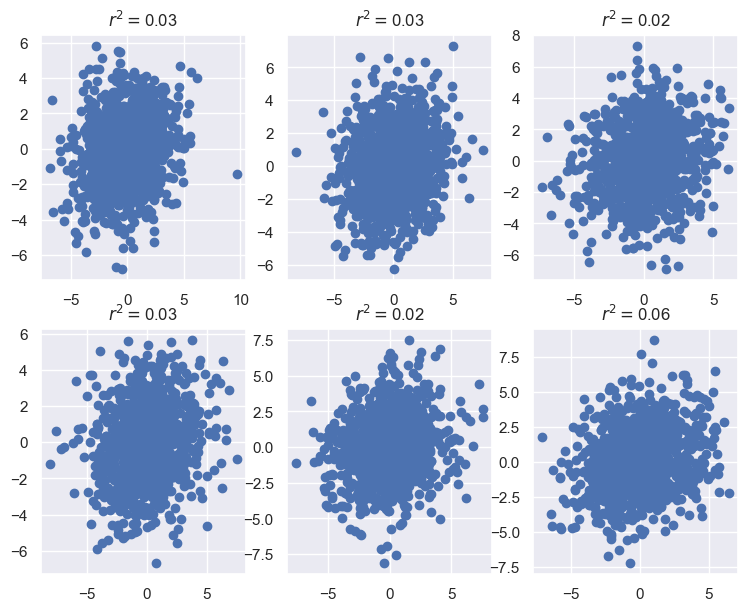

In [10]:
fig, ax = plt.subplots(2,3,figsize=(9,7))
for i in range(6):
    i1, i2 = np.random.choice(d,size=2,replace=False)
    x1, x2 = responses[:,i1], responses[:,i2]
    r = np.corrcoef(x1,x2)[0,1]
    ax.ravel()[i].scatter(x1,x2)
#     ax.ravel()[i].text(-4,0,'$r^2=$'+str(r**2)[:4],c='y')
    ax.ravel()[i].set_title('$r^2=$'+str(r**2)[:4])
    
plt.show()

Each pair of neurons is positively correlaed, but this correlation is extremely weak. Even in this case where we know the data is low-dimensional, the noise has made this hard to detect at the level of single neurons. Hopefully PCA, which aggregates information from the entire population, can give us a more robust view of the low-d structure. 

### Covariance eigenanalysis

To proceed, we form the matrix $X$ by subtracting off the mean firing rate of each neuron. As a sanity check we'll confirm that a randomly selected firing neuron has mean $0$ response. 

In [11]:
X = responses - responses.mean(0)
print("13th firing rate mean after preprocessing is {}".format(X[:,13].mean()))

13th firing rate mean after preprocessing is -4.263256414560601e-17


Next, we compute the covariance.

In [12]:
C = np.cov(X.T)
# Alternatively, we can compute C via
# C = X.T@X/n

Next we compute the eigenvectors and eigenvalues of $C$

In [13]:
E, V = np.linalg.eigh(C)

````{warning}
- `np.linalg.eig` puts the eigenvalues in descending order (biggest first). 
- `np.linalg.eigh`, for **symmetric matrices only**\*, puts the eigenvalues in ascending order (biggest last). 

Since the covariance matrix is symmetric, you're free to use either. Since `eigh` is faster, more stable, and guarantees real outputs, you might as well use it, as we have here. 

\* Actually, you can plug in any *[hermitian matrix](https://en.wikipedia.org/wiki/Hermitian_matrix)* (hence the `h` in `eigh`). 
````

Now we'll make a *scree plot*. In practice you'd probably start by plotting all $d=100$ eigenvalues. In this case, we know the data is low-dimensional, so we'll plot just $10$ dimensions. 

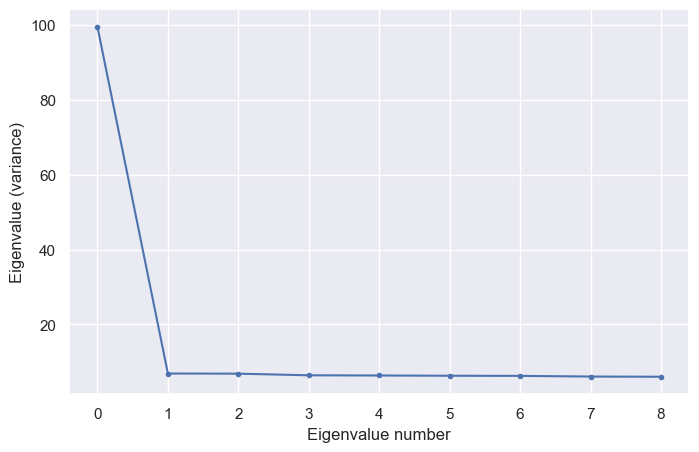

In [14]:
plt.figure(figsize=(8,5))
plt.plot(E[-1:-10:-1],'.-');
plt.xlabel('Eigenvalue number')
plt.ylabel('Eigenvalue (variance)')
plt.show()

Aha! Even though we weren't able to see the redundancy at the few-neuron level in the plots above, the scree plot confirms that there is one overwhelmingly strong direction and a large number of much shorter directions. Our data is in some sense a very elongated (high-dimensional) cigar. 

### Compression 

Let's project our data onto this strong direction, giving us a compressed 1-d description of our population. What is this compressed description encoding? Based on the intuition that the neurons go up and down *in response to the stimulus*, let's plot our $1$-d representation simultaneously with the stimulus. 

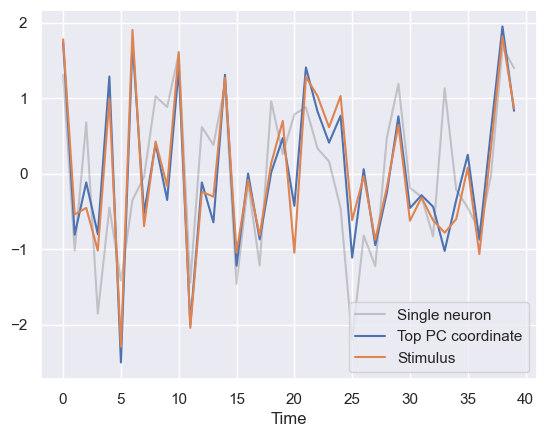

In [15]:
# Project
p = V[:,-1] # Picking out top eigenvector
c1 = X@p #compressing all our data in that direction

# Plot
def standardize(x):
    return (x-x.mean())/x.std()

n_show = 40
plt.figure()
#standardize both for easy visualization
plt.plot(standardize(responses[:n_show,10]),'k',alpha=0.2)
plt.plot(standardize(c1[:n_show]))
plt.plot(standardize(stimuli[:n_show]))
plt.xlabel('Time')
plt.legend(['Single neuron','Top PC coordinate','Stimulus'])
plt.show()

This shows that the high-variance direction of the data is essentialy encoding the stimulus. This is a fairly accurate readout, especially when compared to the response of a single randomly selected neuron (black trace).

### Approximation

Another thing we can do is to approximate the data using our lower-dimensional description. To do this, we simply use the projection formula

```{math}
X_{approx} = X\vec{p}\vec{p}^\top.
```

We then pick a single neuron and plot 4 things:

1. We scatter the neuron's response as a function of the stimulus. This is what we're trying to approximate. 
2. We plot the neuron's *average* response for that stimulus value, which is actually the best we can possibly do, since any deviation from this is just noise. 
3. We scatter the neuron's reconstructed response using the highest-variance direction (ie. the top principal component). 
4. We scatter the neuron's reconstructed response using a randomly chosen direction for comparison. 

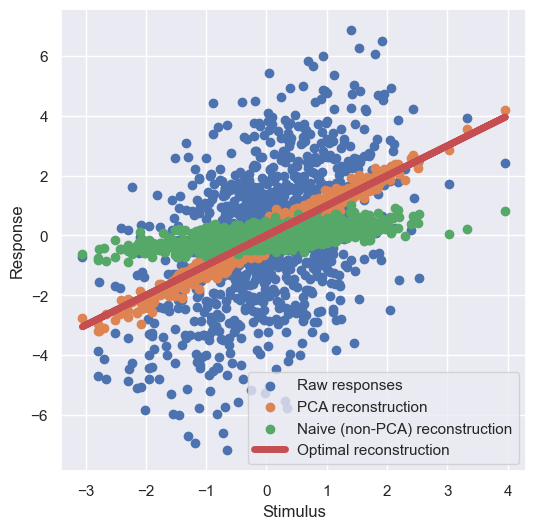

In [16]:
# PCA reconstruction
X_app_PCA = X@p[:,None]@p[None,:]

# Reconstruction using randomly selected 1d subspace
v = np.random.randn(d)
v /= np.sqrt(v@v)
X_app_rand = X@v[:,None]@v[None,:]


plt.figure(figsize=(6,6))
plt.scatter(stimuli,X[:,0],label='Raw responses')
plt.scatter(stimuli,X_app_PCA[:,0],label='PCA reconstruction')
plt.scatter(stimuli,X_app_rand[:,0],label='Naive (non-PCA) reconstruction')
plt.plot(stimuli,stimuli,'r',linewidth=5,label='Optimal reconstruction')
plt.xlabel('Stimulus')
plt.ylabel('Response')
plt.legend()
plt.show()

The PCA reconstruction that uses the highest-variance subspace (ie. the top principal component) is quite close to the optimal reconstruction, and is much better than naive 1-dimensional reconstruction using a randomly selected 1-dimensional subspace. 

(subsec-PCA-code)=
### Code

Here's all of the code we used to do the PCA:

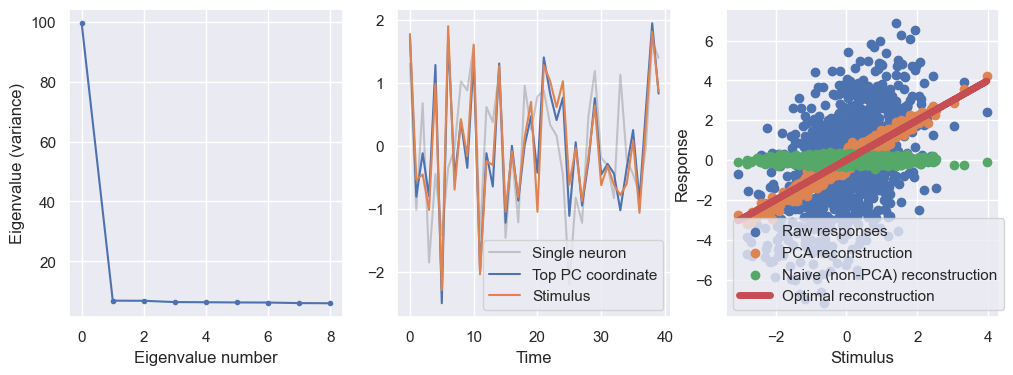

In [17]:
# Generate data
np.random.seed(1) # set random seed
n = 1000 # number of stimuli
d = 100 # number of neurons
σ = 2 # noise level
stimuli = np.random.randn(n)
responses = stimuli[:,None]*np.ones((1,d)) + σ*np.random.randn(n,d)

# Eigendecompose covariance
X = responses - responses.mean(0)
C = np.cov(X.T)
E,V = np.linalg.eigh(C)

# ------Plotting------
fig, ax = plt.subplots(1,3,figsize=(12,4))

# ---Scree plot---
ax[0].plot(E[-1:-10:-1],'.-');
ax[0].set_xlabel('Eigenvalue number')
ax[0].set_ylabel('Eigenvalue (variance)')

# ---Compression---
p = V[:,-1] # Picking out top eigenvector
c1 = X@p

n_show = 40
ax[1].plot(standardize(responses[:n_show,10]),'k',alpha=0.2)
ax[1].plot(standardize(c1[:n_show]))
ax[1].plot(standardize(stimuli[:n_show]))
ax[1].set_xlabel('Time')
ax[1].legend(['Single neuron','Top PC coordinate','Stimulus'])

# ---Approximation---
# PCA reconstruction
X_app_PCA = X@p[:,None]@p[None,:]

# Reconstruction using randomly selected 1d subspace
v = np.random.randn(d)
v /= np.sqrt(v@v)
X_app_rand = X@v[:,None]@v[None,:]

ax[2].scatter(stimuli,X[:,0],label='Raw responses')
ax[2].scatter(stimuli,X_app_PCA[:,0],label='PCA reconstruction')
ax[2].scatter(stimuli,X_app_rand[:,0],label='Naive (non-PCA) reconstruction')
ax[2].plot(stimuli,stimuli,'r',linewidth=5,label='Optimal reconstruction')
ax[2].set_xlabel('Stimulus')
ax[2].set_ylabel('Response')
ax[2].legend()

plt.show()

## Additonal resources

- Play with [this desmos graph](https://www.desmos.com/calculator/4pa8twlgc2) with all the bells and whistles for 2d data. 
- Check out this [short lecture on PCA](https://www.youtube.com/watch?v=fkf4IBRSeEc&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv)